# Exercise 6

## SVM & Regularization


For this homework we consider a set of observations on a number of red and white wine varieties involving their chemical properties and ranking by tasters. Wine industry shows a recent growth spurt as social drinking is on the rise. The price of wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Pricing of wine depends on such a volatile factor to some extent. Another key factor in wine certification and quality assessment is physicochemical tests which are laboratory-based and takes into account factors like acidity, pH level, presence of sugar and other chemical properties. For the wine market, it would be of interest if human quality of tasting can be related to the chemical properties of wine so that certification and quality assessment and assurance process is more controlled.

Two datasets are available of which one dataset is on red wine and have 1599 different varieties and the other is on white wine and have 4898 varieties. All wines are produced in a particular area of Portugal. Data are collected on 12 different properties of the wines one of which is Quality, based on sensory data, and the rest are on chemical properties of the wines including density, acidity, alcohol content etc. All chemical properties of wines are continuous variables. Quality is an ordinal variable with possible ranking from 1 (worst) to 10 (best). Each variety of wine is tasted by three independent tasters and the final rank assigned is the median rank given by the tasters.

A predictive model developed on this data is expected to provide guidance to vineyards regarding quality and price expected on their produce without heavy reliance on volatility of wine tasters.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_r = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/Wine_data_red.csv')
data_w = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/Wine_data_white.csv')

In [3]:
data = data_w.assign(type = 'white')

data = data.append(data_r.assign(type = 'red'), ignore_index=True)
data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
4226,5.6,0.255,0.57,10.7,0.056,66.0,171.0,0.99464,3.25,0.61,10.4,7,white
757,6.8,0.220,0.37,15.2,0.051,68.0,178.0,0.99935,3.40,0.85,9.3,6,white
3393,8.0,0.280,0.30,8.4,0.030,35.0,115.0,0.99192,2.93,0.42,12.3,6,white
4917,7.9,0.320,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,6,red
1119,6.4,0.500,0.16,12.9,0.042,26.0,138.0,0.99740,3.28,0.33,9.0,5,white


# Exercise 6.1

Show the frecuency table of the quality by type of wine

In [4]:
pd.crosstab(data.type, data.quality, margins=True )

quality,3,4,5,6,7,8,9,All
type,,,,,,,,
red,10,53,681,638,199,18,0,1599
white,20,163,1457,2198,880,175,5,4898
All,30,216,2138,2836,1079,193,5,6497


In [5]:
round(pd.crosstab(data.type, data.quality, normalize='all', margins=True)*100,2)

quality,3,4,5,6,7,8,9,All
type,,,,,,,,
red,0.15,0.82,10.48,9.82,3.06,0.28,0.00,24.61
white,0.31,2.51,22.43,33.83,13.54,2.69,0.08,75.39
All,0.46,3.32,32.91,43.65,16.61,2.97,0.08,100.00


# SVM

# Exercise 6.2

* Standarized the features (not the quality)
* Create a binary target for each type of wine
* Create two Linear SVM's for the white and red wines, repectively.


In [6]:
# Standarized the features
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [7]:
lista=list(data.columns)
print(lista)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'type']


In [8]:
type(lista)
lista.remove("quality")
lista.remove("type")
print(lista)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [9]:
data_e=data
for j in lista:
    data_e[j]=(data[j]-data[j].mean())/data[j].std()
data_e.head()
    
#x=(data['fixed acidity']-data['fixed acidity'].mean())/data['fixed acidity'].std()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,-0.166076,-0.423150,0.284664,3.206682,-0.314951,0.815503,0.959902,2.102052,-1.358944,-0.546136,-1.418449,6,white
1,-0.706019,-0.240931,0.147035,-0.807775,-0.200775,-0.931035,0.287595,-0.232314,0.506876,-0.277330,-0.831551,6,white
2,0.682405,-0.362411,0.559923,0.306184,-0.172231,-0.029596,-0.331634,0.134515,0.258100,-0.613338,-0.328496,6,white
3,-0.011807,-0.666110,0.009405,0.642474,0.056121,0.928182,1.242978,0.301255,-0.177258,-0.882144,-0.496181,6,white
4,-0.011807,-0.666110,0.009405,0.642474,0.056121,0.928182,1.242978,0.301255,-0.177258,-0.882144,-0.496181,6,white


In [10]:
pd.value_counts(data_e['type'])

white    4898
red      1599
Name: type, dtype: int64

In [11]:
# Create a binary target for each type of wine
data_e['Calificacion']=[1 if x<=6 else 0 for x in data_e['quality']]
data_e['Vino']=[1 if x=='red' else 0 for x in data_e['type']]

data_ew = data_e[data_e.type=='white']
data_er = data_e[data_e.type=='red']
data_er.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,Calificacion,Vino
4898,0.142462,2.188664,-2.192664,-0.744721,0.569914,-1.100055,-1.446247,1.034913,1.812950,0.193082,-0.915394,5,red,1,1
4899,0.451001,3.281982,-2.192664,-0.597594,1.197883,-0.311296,-0.862402,0.701432,-0.115064,0.999502,-0.580023,5,red,1,1
4900,0.451001,2.553104,-1.917405,-0.660648,1.026618,-0.874695,-1.092402,0.768128,0.258100,0.797897,-0.580023,5,red,1,1
4901,3.073580,-0.362411,1.660957,-0.744721,0.541370,-0.762016,-0.986248,1.101609,-0.363840,0.327485,-0.580023,6,red,1,1
4902,0.142462,2.188664,-2.192664,-0.744721,0.569914,-1.100055,-1.446247,1.034913,1.812950,0.193082,-0.915394,5,red,1,1


In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import accuracy_score
plt.style.use('bmh')

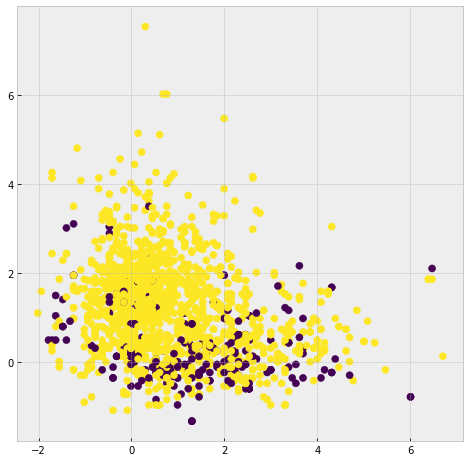

In [13]:
# analisis de variables considerando el tipo de vino
X1=data_er["fixed acidity"]
X2=data_er["volatile acidity"]
y=data_er["Calificacion"]
plt.figure(figsize=(8,8))
plt.scatter(X1, X2, c=y, s=50);

##### Estas graficas se crean con el objetivo de poder apreciar la relación de dos de las variables consideradas dentro del ejericicio de SVM y como se puede apreciar la separación lineal no se ve con claridad

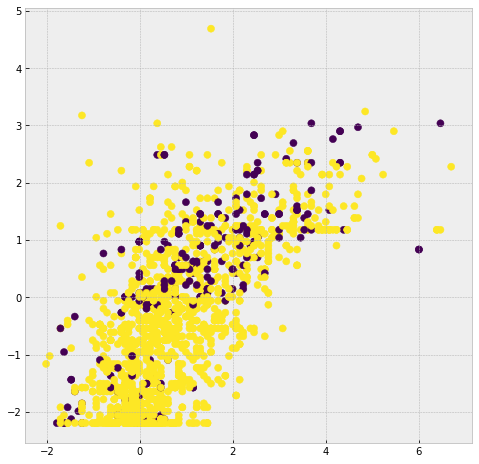

In [14]:
# analisis de variables considerando el tipo de vino
X1=data_er["fixed acidity"]
X2=data_er['citric acid']
y=data_er["Calificacion"]
plt.figure(figsize=(8,8))
plt.scatter(X1, X2, c=y, s=50);

##### combinando otro par de variables tampoco podemos apreciar grupos separables, sin embargo es claro que la intreacción de todas las variables y las transformaciones de los datos a través de los kernel podran encontrar una separación

In [15]:
data_er.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,Calificacion,Vino
4898,0.142462,2.188664,-2.192664,-0.744721,0.569914,-1.100055,-1.446247,1.034913,1.812950,0.193082,-0.915394,5,red,1,1
4899,0.451001,3.281982,-2.192664,-0.597594,1.197883,-0.311296,-0.862402,0.701432,-0.115064,0.999502,-0.580023,5,red,1,1
4900,0.451001,2.553104,-1.917405,-0.660648,1.026618,-0.874695,-1.092402,0.768128,0.258100,0.797897,-0.580023,5,red,1,1
4901,3.073580,-0.362411,1.660957,-0.744721,0.541370,-0.762016,-0.986248,1.101609,-0.363840,0.327485,-0.580023,6,red,1,1
4902,0.142462,2.188664,-2.192664,-0.744721,0.569914,-1.100055,-1.446247,1.034913,1.812950,0.193082,-0.915394,5,red,1,1


### Caso de Vinos Rojos

In [16]:
# Conformacion de la matriz X y la variables de clasificacion y
eliminar=['quality','type','Calificacion','Vino']
X=data_er.drop(columns=eliminar)
X.head()
y=data_er["Calificacion"]
y.head()

4898    1
4899    1
4900    1
4901    1
4902    1
Name: Calificacion, dtype: int64

In [17]:
# Creacion de datos de entrenamiento y validacion
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
Train=X_train.shape
Test=X_test.shape
frame=[Train, Test]
print(frame)

[(1071, 11), (528, 11)]


##### el conjunto se separa en un grupo de entrenamiento y un grupo de validación, el primero con 1071 observaciones y el segundo con 528 observaciones

In [19]:
from sklearn.svm import SVC # "Support Vector Classifier"
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8541666666666666

##### Al ejecutar el modelo de SVM encontramos una separación que nos logra clasificar bien los datos de validaciòn en un 85.4% lo cual es un excelente resultado

In [20]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred, normalize=False)
print('Casos clasificados con precision: ' + str(accuracy))

Casos clasificados con precision: 451


##### El 85.4% de precision en la calsificación, representa que del total de observaciones de validación  (528) puede clasificar correctamente 451 casos 

##### Con este resultado podemos afirmar que a partir de las variables cuantitativas medidas en los vinos rojos, podemos en un 85% de los casos lograr una calificación igual al de los sommeliers, lo cual es muy bueno en la medida que una maquina puede replicar la calificación de un experto

# Exercise 6.3

Test the two SVM's using the different kernels (‘poly’, ‘rbf’, ‘sigmoid’)


In [21]:
clf = SVC(kernel='poly')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8768939393939394

In [22]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred, normalize=False)
print('Casos clasificados con precision: ' + str(accuracy))

Casos clasificados con precision: 463


In [23]:
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8787878787878788

In [24]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred, normalize=False)
print('Casos clasificados con precision: ' + str(accuracy))

Casos clasificados con precision: 464


In [25]:
clf = SVC(kernel='sigmoid')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7746212121212122

In [26]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred, normalize=False)
print('Casos clasificados con precision: ' + str(accuracy))

Casos clasificados con precision: 409


##### Al utilizar otros kernel, diferentes al lineal, encontramos que el resultado mejora, es decir que con una transformaciòn RBF el % de coincidencias en las calificaciones sube de 85.4% a 87.9%

### Caso de Vinos Blancos

In [27]:
# Conformacion de la matriz X y la variables de clasificacion y
eliminar=['quality','type','Calificacion','Vino']
X=data_ew.drop(columns=eliminar)
X.head()
y=data_ew["Calificacion"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Calificacion, dtype: int64

In [28]:
# Creacion de datos de entrenamiento y validacion
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [29]:
Train=X_train.shape
Test=X_test.shape
frame=[Train, Test]
print(frame)

[(3281, 11), (1617, 11)]


In [30]:
from sklearn.svm import SVC # "Support Vector Classifier"
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7767470624613482

##### En el caso de los vinos blancos los resultados tambien son buenos (77%), aunque ligeramente inferiores a los de los vinos tintos, esto nos puede indicar que las variables consideradas no logran tan buena precisión en la calificación cuando se analizan en vinos blancos.

In [31]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred, normalize=False)
print('Casos clasificados con precision: ' + str(accuracy))

Casos clasificados con precision: 1256


In [32]:
clf = SVC(kernel='poly')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8045763760049475

In [33]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred, normalize=False)
print('Casos clasificados con precision: ' + str(accuracy))

Casos clasificados con precision: 1301


In [34]:
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8163265306122449

In [35]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred, normalize=False)
print('Casos clasificados con precision: ' + str(accuracy))

Casos clasificados con precision: 1320


In [36]:
clf = SVC(kernel='sigmoid')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7149041434755721

In [37]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred, normalize=False)
print('Casos clasificados con precision: ' + str(accuracy))


Casos clasificados con precision: 1156


##### Al utilizar otras transformaciones la clasificación mejora, pasando de 77% a 81%, tambien con el kernel RBF, por lo tanto tambien podemos concluir que en el caso de los vinos blancos podemos encontrar por medio de unas variables observadas y medidas una calificación bastante precisa de la calidad del vino, considerando la coincidencia entre el modelo y el criterio de los sommeliers

# Exercise 6.4
Using the best SVM find the parameters that gives the best performance

'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001]

In [38]:
List_C=[0.1,1,10,100,1000]
List_G=[0.01,0.001,0.0001]

m=0
for i in List_C:
    #print(i)
    for j in List_G:
        #print(j)
        # Supongamos que Sigmoid es el mejor kernel
        clf = SVC(kernel='rbf', C=i, gamma=j)
        clf.fit(X, y)
        score=clf.score(X_test, y_test)  
        Lista=np.reshape([i,j,score],(3,1)).T
        #Lista=format(Lista,"c")
        df = pd.DataFrame(Lista)
      
        if m==0:
            Tabla_res=df
        if m==1:
            frame=[Tabla_res,df]
            Tabla_res=pd.concat(frame)
        m=1    


In [39]:
print(Tabla_res)

        0       1         2
0     0.1  0.0100  0.776747
0     0.1  0.0010  0.776747
0     0.1  0.0001  0.776747
0     1.0  0.0100  0.787260
0     1.0  0.0010  0.776747
0     1.0  0.0001  0.776747
0    10.0  0.0100  0.814471
0    10.0  0.0010  0.776747
0    10.0  0.0001  0.776747
0   100.0  0.0100  0.821274
0   100.0  0.0010  0.795918
0   100.0  0.0001  0.776747
0  1000.0  0.0100  0.833643
0  1000.0  0.0010  0.812616
0  1000.0  0.0001  0.776747


##### Usando entoncesl el modelo RBF podemos revisar como se logra el precisión del modelo de clasificación ajustando los parametros que considera este kernel. podemos apreciar en la tabla anterior que moviendonos n los parametros C y Gamma, logramos la mejor clasificación con los parametros:

##### C = 1000 y Gamma = 0.01

##### Con estos parámetros la clasificación en este caso de los vinos Blancos, mejora hasta un 83.3% 

# Exercise 6.5

Compare the results with other methods

### Parameter estimation using grid search with cross-validation

In [40]:
%matplotlib inline

In [41]:
Xa_train = X_train.values
print(Xa_train)

[[-1.2459619  -0.36241058  0.55992279 ... -0.05287017 -0.68053952
   1.34835527]
 [ 0.8366744   0.42720789  1.31688409 ... -1.23455626  0.12588026
   0.76145738]
 [-1.47736593 -0.18019093  0.42229346 ...  0.75565189 -0.47893457
   1.01298505]
 ...
 [ 0.29673166 -0.42315046  1.38569876 ... -1.23455626 -0.00852303
   0.76145738]
 [-0.70601915 -0.60537011 -0.19703851 ... -0.30164619 -1.01654776
   0.09071695]
 [ 0.68240504 -0.42315046  0.21584947 ...  0.00932384  0.66349345
  -0.07696816]]


In [42]:
print(Xa_train)

[[-1.2459619  -0.36241058  0.55992279 ... -0.05287017 -0.68053952
   1.34835527]
 [ 0.8366744   0.42720789  1.31688409 ... -1.23455626  0.12588026
   0.76145738]
 [-1.47736593 -0.18019093  0.42229346 ...  0.75565189 -0.47893457
   1.01298505]
 ...
 [ 0.29673166 -0.42315046  1.38569876 ... -1.23455626 -0.00852303
   0.76145738]
 [-0.70601915 -0.60537011 -0.19703851 ... -0.30164619 -1.01654776
   0.09071695]
 [ 0.68240504 -0.42315046  0.21584947 ...  0.00932384  0.66349345
  -0.07696816]]


In [43]:
type(Xa_train)

numpy.ndarray

In [44]:
ya_test.shape

NameError: name 'ya_test' is not defined

In [ ]:
ya_train = y_train.values
print(ya_train)

In [ ]:
ya_test = y_test.values
print(ya_test)
type(ya_test)

In [ ]:
Xa_test = X_test.values
print(Xa_test)
type(Xa_test)

In [ ]:
from __future__ import print_function

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

In [ ]:
set(ya_test) - set(ya_pred)

In [ ]:
    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)

In [ ]:
    clf.fit(Xa_train, ya_train)

In [ ]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(Xa_train, ya_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    ya_true, ya_pred = ya_test, clf.predict(Xa_test)
    print(classification_report(ya_true, ya_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

# Regularization

# Exercise 6.6


* Train a linear regression to predict wine quality (Continous)

* Analyze the coefficients

* Evaluate the RMSE

### Modelo de regresion con la información completa de vinos

In [45]:
# Conformacion de la matriz X y la variables de clasificacion y
eliminar=['quality','type','Calificacion','Vino']
X=data_e.drop(columns=eliminar)
y=data_e["quality"]
# Creacion de datos de entrenamiento y validacion
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [46]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(fit_intercept=True)
linreg.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
# The coefficients
print('Coefficients: \n', linreg.coef_)

Coefficients: 
 [ 0.09033406 -0.21493006 -0.02163379  0.2060452  -0.01250238  0.1311296
 -0.15905885 -0.16272485  0.06494459  0.11616343  0.31692833]


In [48]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     165.4
Date:                Mon, 18 Feb 2019   Prob (F-statistic):          6.52e-322
Time:                        12:06:17   Log-Likelihood:                -5109.5
No. Observations:                4547   AIC:                         1.024e+04
Df Residuals:                    4535   BIC:                         1.032e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.8138 

##### El ajuste del modelo no es bueno, si bien la hipotesis nula de significancia del modelo se rechaza y el modelo es significativamente diferente de cero con una confianza del 95%, en terminos de coeficientes la mayoria de las variables son significativamente diferentes de cero, a excepción de Citric_acid y chlorides

In [49]:
# Make predictions using the testing set
y_pred = linreg.predict(X_test)                  

In [50]:
from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print('Coefficients: \n', linreg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Coefficients: 
 [ 0.09033406 -0.21493006 -0.02163379  0.2060452  -0.01250238  0.1311296
 -0.15905885 -0.16272485  0.06494459  0.11616343  0.31692833]
Mean squared error: 0.51


#### El error cuadratido medio del modelo de regresion es de 0.51

# Exercise 6.7

* Estimate a ridge regression with alpha equals 0.1 and 1.
* Compare the coefficients with the linear regression
* Evaluate the RMSE

In [51]:
from sklearn.linear_model import Ridge
import numpy as np
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

m=0
for i in list(range(10,100,1)):
    j=i/100
    clf = Ridge(alpha=j, fit_intercept=True)
    clf.fit(X_train, y_train) 
    #Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
    #      normalize=False, random_state=None, solver='auto', tol=0.001)
    score=clf.score(X_test, y_test)  
    Lista=np.reshape([j,score],(2,1)).T
    df = pd.DataFrame(Lista)
    if m==0:
        Tabla_res=df
    if m==1:
        frame=[Tabla_res,df]
        Tabla_res=pd.concat(frame)
    m=1
Tabla_res=Tabla_res.rename({0:'Parametro', 1:'Score'}, axis='columns')
Selec_final=Tabla_res[Tabla_res['Score']==Tabla_res['Score'].max()]
print(Selec_final)

   Parametro     Score
0       0.99  0.304566


In [52]:
clf = Ridge(alpha=0.99, fit_intercept=True)
clf.fit(X_train, y_train)
score=clf.score(X_test, y_test) 
print(score)

0.30456590087579316


In [55]:
# Make predictions using the testing set
y_pred = clf.predict(X_test)  
from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print('Coefficients: \n', clf.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Coefficients: 
 [ 0.08994834 -0.21492008 -0.02158062  0.2055006  -0.01258275  0.13103639
 -0.15888149 -0.16199728  0.06471802  0.11606811  0.31716459]
Mean squared error: 0.51


##### Analisis de los codigos de la regresion (Lineal vs Ridge):
##### Coeficientes regresion lineal: 
 [ 0.09033406 -0.21493006 -0.02163379  0.2060452  -0.01250238  0.1311296
 -0.15905885 -0.16272485  0.06494459  0.11616343  0.31692833]
 
##### Coeficientes regresión Ridge

 [ 0.08994834 -0.21492008 -0.02158062  0.2055006  -0.01258275  0.13103639
 -0.15888149 -0.16199728  0.06471802  0.11606811  0.31716459]
 
##### en general son muy similares, en algunos casos las diferencias son en el segundo o tercer decimal, La similaridad de los coeficientes nos indica que en este caso la regresion linea no esta realizando un over fitting al modelo, ya que la regresion Ridge justamente busca minimizar el tamaño de los coeficientes


# Exercise 6.8

* Estimate a lasso regression with alpha equals 0.01, 0.1 and 1.
* Compare the coefficients with the linear regression
* Evaluate the RMSE

In [56]:
from sklearn import linear_model
import numpy as np
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

m=0
for i in list(range(10,100,1)):
    j=i/100
    clf = linear_model.Lasso(alpha=j,fit_intercept=True)
    clf.fit(X_train, y_train) 
    #Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
    #      normalize=False, random_state=None, solver='auto', tol=0.001)
    score=clf.score(X_test, y_test)  
    Lista=np.reshape([j,score],(2,1)).T
    df = pd.DataFrame(Lista)
    if m==0:
        Tabla_res=df
    if m==1:
        frame=[Tabla_res,df]
        Tabla_res=pd.concat(frame)
    m=1
Tabla_res=Tabla_res.rename({0:'Parametro', 1:'Score'}, axis='columns')
Selec_final=Tabla_res[Tabla_res['Score']==Tabla_res['Score'].max()]
print(Selec_final)

   Parametro     Score
0        0.1  0.248324


In [57]:
clf = linear_model.Lasso(alpha=0.1,fit_intercept=True)
clf.fit(X_train, y_train)
score=clf.score(X_test, y_test) 
print(score)

0.24832449312782504


In [58]:
# Make predictions using the testing set
y_pred = clf.predict(X_test)  
from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print('Coefficients: \n', clf.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Coefficients: 
 [-0.         -0.11651172  0.          0.         -0.          0.
 -0.         -0.          0.          0.          0.2801013 ]
Mean squared error: 0.55


##### Analisis de los codigos de la regresion (Lineal vs Lasso):
##### Coeficientes regresion lineal: 
 [ 0.09033406 -0.21493006 -0.02163379  0.2060452  -0.01250238  0.1311296
 -0.15905885 -0.16272485  0.06494459  0.11616343  0.31692833]
 
##### Coeficientes regresión Lasso

 [-0.         -0.11651172  0.          0.         -0.          0.
 -0.         -0.          0.          0.          0.2801013 ]
 
#####  En este caso los coeficientes diferentes de cero, son los mas importantes para explicar la variable dependiente e interpretar sus resultados, estos coeficientes corresponde obviamente a variables cuyos coeficientes de regresión lineal son estadisticamente diferentes con un 95% de confianza.


# Exercise 6.9

* Create a binary target

* Train a logistic regression to predict wine quality (binary)

* Analyze the coefficients

* Evaluate the f1score

In [59]:
# Create a binary target for each type of wine
data_e['Calificacion']=[1 if x<=6 else 0 for x in data_e['quality']]
# Conformacion de la matriz X y la variables de clasificacion y
eliminar=['quality','type','Calificacion','Vino']
X=data_e.drop(columns=eliminar)
X.head()
y=data_e["Calificacion"]
y.head() 

0    1
1    1
2    1
3    1
4    1
Name: Calificacion, dtype: int64

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X, y)
score=clf.score(X, y)
print('Score: \n',score)
# The coefficients
print('Coefficients: \n', clf.coef_)
y_pred = clf.predict(X) 

print('f1 score(macro): \n', f1_score(y, y_pred, average='macro')  )
print('f1 score(micro): \n', f1_score(y, y_pred, average='micro')  )
print('f1 score(weighted): \n', f1_score(y, y_pred, average='weighted'))  
print('f1 score(None): \n', f1_score(y, y_pred, average=None))

Score: 
 0.8197629675234723
Coefficients: 
 [[-0.2797975   0.27692402  0.02292764 -0.41309472  0.10814829 -0.11265519
   0.16482444  0.44675179 -0.18940485 -0.18383008 -0.34847837]]
f1 score(macro): 
 0.6321340098249592
f1 score(micro): 
 0.8197629675234723
f1 score(weighted): 
 0.7915781865933292
f1 score(None): 
 [0.36941303 0.89485499]


#### El f1 score lo interpretamos como el promedio ponderado de la precisión de clasificación que se logra con el modelo logistico

# Exercise 6.10

* Estimate a regularized logistic regression using:
* C = 0.01, 0.1 & 1.0
* penalty = ['l1, 'l2']
* Compare the coefficients and the f1score

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X, y)
print('Score: \n',score)
# The coefficients
print('Coefficients: \n', clf.coef_)
y_pred = clf.predict(X) 

print('f1 score(macro): \n', f1_score(y, y_pred, average='macro')  )
print('f1 score(micro): \n', f1_score(y, y_pred, average='micro')  )
print('f1 score(weighted): \n', f1_score(y, y_pred, average='weighted'))  
print('f1 score(None): \n', f1_score(y, y_pred, average=None))

Score: 
 0.8197629675234723
Coefficients: 
 [[-0.2797975   0.27692402  0.02292764 -0.41309472  0.10814829 -0.11265519
   0.16482444  0.44675179 -0.18940485 -0.18383008 -0.34847837]]
f1 score(macro): 
 0.6321340098249592
f1 score(micro): 
 0.8197629675234723
f1 score(weighted): 
 0.7915781865933292
f1 score(None): 
 [0.36941303 0.89485499]


#### El f1 score lo interpretamos como el promedio ponderado de la precisión de clasificación que se logra con el modelo logistico

### FIN